# **2-Regex & Minimum Edit Distance**


#### **Anggota Kelompok**
- Elmosius Suli (2272008)
- Christopher Wijaya (2272016)
- Josephine Alvina Luwia (2272029)
- Samuel Setyawan Prakasa (2272030)

<br/>

---

<br/>


 <br/>


**Import Library Regex terlebih dahulu**

In [20]:
import re



### **2.1 Write regular expressions for the following languages**



> **1. the set of all alphabetic strings**

In [ ]:
def is_alphabetic(s: str) -> bool:
    pattern = r'[a-zA-Z]+'

    return bool(re.fullmatch(pattern, s))


def is_alphabetic2(s: str) -> bool:
    pattern = r'[a-zA-Z]+'

    return bool(re.fullmatch(pattern, s, re.I))

In [ ]:
print(is_alphabetic(''))
print(is_alphabetic('abcd'))
print(is_alphabetic('123'))
print(is_alphabetic('abc123'), "\n")

print(is_alphabetic2(''))
print(is_alphabetic2('abcd'))
print(is_alphabetic2('123'))
print(is_alphabetic2('abc123'))

False
True
False
False 

False
True
False
False



```
Cara pertama:
> [...] →  fungsinya untuk memilih salah satu karakter yang ada di dalam kurung siku.
> a-z → fungsinya untuk range untuk huruf kecil a sampai z.
> A-Z → fungsinya untuk range untuk huruf besar A sampai Z.

Jadi, [a-zA-Z] = satu karakter yang boleh huruf kecil atau huruf besar.

> + → berarti 1 kali atau lebih. Jadi string minimal harus ada 1 huruf.

fungsi re.fullmatch ini artinya seluruh string s harus cocok sama pattern yang kita tentukan.


Cara kedua:
Hampir sama tetapi unuk dalam sikunya cukup memakai [a-z] saja

Sisanya kita bisa manfaatkan parameter ketiga dari fungsi fullmatch ini
yaitu flags, yang isinya tuh bisa antara ketiga ini

> re.I atau re.IGNORECASE → abaikan perbedaan huruf besar/kecil.
> re.M atau re.MULTILINE → ubah cara kerja ^ dan $ (per baris).
> re.S atau re.DOTALL → bikin . juga bisa match newline.


```

> **2. the set of all lower case alphabetic strings ending in a b**

In [ ]:
PATTERN = r'^[a-z]*b$'
def check_string(s: str) -> bool:
    return re.fullmatch(PATTERN, s) is not None

test_cases = [
    ("b", True),
    ("ab", True),
    ("azb", True),
    ("contohstringb", True),
    ("zzzzzb", True),

    ("a", False),
    ("ba", False),
    ("B", False),
    ("abc", False),
    ("123b", False),
    ("", False)
]

def run_tests():
    print(f"Pola Regex: {PATTERN}\n")
    print("--- Hasil Pengujian ---")

    for string, expected in test_cases:
        result = check_string(string)
        status = "PASSED" if result == expected else "FAILED"
        print(f"String: '{string.ljust(15)}' | Match: {str(result).ljust(5)} | Expected: {str(expected).ljust(5)} | Status: {status}")
if __name__ == "__main__":
    run_tests()

Pola Regex: ^[a-z]*b$

--- Hasil Pengujian ---
String: 'b              ' | Match: True  | Expected: True  | Status: PASSED
String: 'ab             ' | Match: True  | Expected: True  | Status: PASSED
String: 'azb            ' | Match: True  | Expected: True  | Status: PASSED
String: 'contohstringb  ' | Match: True  | Expected: True  | Status: PASSED
String: 'zzzzzb         ' | Match: True  | Expected: True  | Status: PASSED
String: 'a              ' | Match: False | Expected: False | Status: PASSED
String: 'ba             ' | Match: False | Expected: False | Status: PASSED
String: 'B              ' | Match: False | Expected: False | Status: PASSED
String: 'abc            ' | Match: False | Expected: False | Status: PASSED
String: '123b           ' | Match: False | Expected: False | Status: PASSED
String: '               ' | Match: False | Expected: False | Status: PASSED


```
Penjelasan pattern
-> ^      -> Mencocokkan awal string
-> [a-z]* -> Mencocokkan nol atau lebih karakter huruf kecil (a-z)
-> b      -> Mencocokkan karakter 'b' secara literal
-> $      -> Mencocokkan akhir string

Menggunakan ekspresi reguler ^[a-z]*b$ dan fungsi re.fullmatch()
untuk memastikan string yang diuji benar-benar merupakan
string alfabet huruf kecil yang secara keseluruhan diakhiri dengan b
```

> **3. the set of all strings from the alphabet a, b such that each a is immediately preceded by and immediately followed by a b**

In [ ]:
pattern = r"^(b|bab)*$"

def is_valid_str(s: str) -> bool:
    return bool(re.fullmatch(pattern, s))

In [ ]:
print(f"'' is valid: {is_valid_str('')}")
print(f"'b' is valid: {is_valid_str('b')}")
print(f"'bab' is valid: {is_valid_str('bab')}")
print(f"'bbab' is valid: {is_valid_str('bbab')}")
print(f"'babb' is valid: {is_valid_str('babb')}")
print(f"'babbab' is valid: {is_valid_str('babbab')}")
print(f"'ab' is valid: {is_valid_str('ab')}")
print(f"'ba' is valid: {is_valid_str('ba')}")
print(f"'a' is valid: {is_valid_str('a')}")
print(f"'baa' is valid: {is_valid_str('baa')}")

'' is valid: True
'b' is valid: True
'bab' is valid: True
'bbab' is valid: True
'babb' is valid: True
'babbab' is valid: True
'ab' is valid: False
'ba' is valid: False
'a' is valid: False
'baa' is valid: False


```
Penjelasan Pattern:
> ^ adalah anchor untuk mulainya string.

> () Tanda kurung yaitu untuk mengelompokan ekspresi b|bab

> b untuk mencocokkan karakter b, ini membolehkan string seperti
  b, bb, bbb dan juga membolehkan string untuk mulai dengan b atau
  terdapat beberapa b diantara bab.

> | adalah operator OR, pada pattern (b|bab) berarti "mencocokkan 'b' atau 'bab'."

> bab untuk mencocokkan urutan bab, pada bab ini lah munculnya a, 'b' harus ada sebelum dan setelah 'a'

> * adalah kuantifier yang artinya grup sebelumnya
  (b|bab) dapat muncul 0 kali atau lebih, ini memungkinan string kosong untuk valid juga.

> $ adalah anchor untuk akhirnya string.

Penjelasan Kode:
> Fungsi re.fullmatch ini artinya seluruh string s harus cocok sama pattern yang kita tentukan.
```

---


### **2.2 Write regular expressions for the following languages. By “word”, web mean an alphabetic string separated from other words by whitespace, any relevant punctuation, line breaks, and so forth.**

> **1. the set of all strings with two consecutive repeated words (e.g., “Humbert Humbert” and “the the” but not “the bug” or “the big bug”);**

In [24]:
def has_repeated_words(text):
    pattern = r'\b(\w+)\s+\1\b'
    return bool(re.search(pattern, text))

In [25]:
print(has_repeated_words("the the"))
print(has_repeated_words("Humbert Humbert"))
print(has_repeated_words("the bug"))
print(has_repeated_words("the big bug"))

True
True
False
False



```
Penjelasan Partten :
> \b → berfungsi sebagai word boundary (batas kata), memastikan kata tidak nempel dengan huruf lain.
> (\w+) → menangkap satu kata (huruf, angka, underscore). Tanda kurung artinya ini grup pertama.
> \s+ → satu atau lebih spasi/whitespace.
> \1 → backreference ke grup pertama. Jadi kata yang sama harus muncul lagi persis sama.
> \b → boundary lagi untuk menutup kata kedua.

Jadi pola \b(\w+)\s+\1\b = satu kata, lalu spasi, lalu kata yang sama lagi.
Fungsi re.search artinya kalau ada bagian string yang cocok dengan pola, hasilnya True.


```

> **2. all strings that start at the beginning of the line with an integer and that end at the end of the line with a word**

In [26]:
def starts_with_integer_and_ends_with_word(line):
    pattern = r'^\d+\s*(\w+)$'
    match = re.match(pattern, line)
    return bool(match)

In [27]:
print(starts_with_integer_and_ends_with_word("123 hello"))
print(starts_with_integer_and_ends_with_word("45 ends"))
print(starts_with_integer_and_ends_with_word("no 123 word"))
print(starts_with_integer_and_ends_with_word("99 test!"))

True
True
False
False



```
Penjelasan Partten
> ^ → posisi awal string.
> \d → satu digit angka (0–9).
> .* → nol atau lebih karakter bebas setelah angka pertama.
> \b\w+\b → sebuah kata yang terdiri dari huruf/angka/underscore, dibatasi boundary kata.
> $ → posisi akhir string.

Jadi, ^\d.*\b\w+\b$ artinya “string harus dimulai dengan angka, dan berakhir dengan sebuah kata”.

```

> **3. all strings that have both the word grotto and the word raven in them (but not, e.g., words like grottos that merely contain the word grotto)**

In [ ]:
pattern = r"\b(grotto\b.*\braven|raven\b.*\bgrotto)\b"

def has_both_words(text):
  return re.search(pattern, text, re.DOTALL) is not None

In [ ]:
print(f"'The grotto had a raven.' is valid: {has_both_words('The grotto had a raven.')}")
print(f"'A raven flew near the grotto.' is valid: {has_both_words('A raven flew near the grotto.')}")
print(f"'grotto\n\nraven' is valid: {has_both_words('grotto\n\nraven')}")

print("")
print(f"'Only the grotto.' is valid: {has_both_words('Only the grotto.')}")
print(f"'It was a grottos.' is valid: {has_both_words('It was a grottos.')}")
print(f"'The ravening grottos.' is valid: {has_both_words('The ravening grottos.')}")

'The grotto had a raven.' is valid: True
'A raven flew near the grotto.' is valid: True
'grotto

raven' is valid: True

'Only the grotto.' is valid: False
'It was a grottos.' is valid: False
'The ravening grottos.' is valid: False
is valid: True


```
Penjelasan Pattern:
> \b mencocokkan posisi antara karakter kata
  (seperti a-z, A-Z, 0-9, atau _) dan karakter non-kata
  (seperti spasi, tanda baca, atau awal/akhir string).

  Dengan adanya \b disekitar sebuah kata (contoh, \bgrotto\b),
  maka akan dipastikan hanya cocok dengan kata tersebut dan bukan kata yang
  memuatnya sebagai sub-string (seperti grottos, egrotto, atau grotto-like).

> grotto mencocokkan dengan kata grotto

> raven mencocokkan dengan kata raven

> .* adalah kombinasi 2 regex token. Titik (.)
  memungkinkan mesin regex untuk melewati semua
  jenis karakter (huruf, angka, spasi, tanda baca)
  saat mencari kata kedua.

  Bintang (*) memperbolehkan elemen titik (.)
  untuk diulang sebanyak berapa pun, artinya dapat mencocokkan pemisah
  dengan panjang apa pun dari string kosong hingga ribuan karakter.

  Kalau digabung menjadi .* memiliki arti
  "Mencocokkan karakter apapun (kecuali baris baru) nol kali atau lebih.

  .* bersifat greedy artinya akan mencocokkan
  jumlah karakter maksimum yang mungkin antara kedua kata.

> | untuk mencocokkan antara "grotto lalu raven" atau "raven lalu grotto"

> () Tanda kurung yaitu untuk mengelompokan

Penjelasan Kode:
> re.search kerjanya untuk menemukan pola di mana saja dalam string.

> re.DOTALL kerjanya untuk memastikan .* dapat
  cocok di seluruh jeda baris (kata-kata dapat berada di baris yang berbeda)
```

> **4. write a pattern that places the first word of an English sentence in a register. Deal with punctuation.**

In [ ]:
PATTERN = r'^\s*([a-zA-Z]+)(?=[\s.,:;?!]|$)'

def capture_first_word(sentence: str) -> str | None:
    match = re.search(PATTERN, sentence)

    if match:
        return match.group(1)
    else:
        return None

test_cases = [
    ("This is the first sentence.", "This"),
    ("  Whitespace before is ignored.", "Whitespace"),
    ("Word, followed by a comma.", "Word"),
    ("Another-Example is invalid.", None),
    ("Question?", "Question"),
    ("Exclamation!", "Exclamation"),
    ("One.", "One"),
    (" Single", "Single"),
    ("word:", "word"),
    ("", None),
]

def run_tests():
    print(f"Pola Regex: {PATTERN}\n")
    print("--- Hasil Penangkap Kata Pertama ---")

    for sentence, expected in test_cases:
        captured_word = capture_first_word(sentence)
        status = "PASSED" if captured_word == expected else "FAILED"
        print(f"Kalimat: '{sentence.ljust(35)}' | Ditangkap: '{str(captured_word).ljust(15)}' | Expected: '{str(expected).ljust(15)}' | Status: {status}")

if __name__ == "__main__":
    run_tests()

Pola Regex: ^\s*([a-zA-Z]+)(?=[\s.,:;?!]|$)

--- Hasil Penangkap Kata Pertama ---
Kalimat: 'This is the first sentence.        ' | Ditangkap: 'This           ' | Expected: 'This           ' | Status: PASSED
Kalimat: '  Whitespace before is ignored.    ' | Ditangkap: 'Whitespace     ' | Expected: 'Whitespace     ' | Status: PASSED
Kalimat: 'Word, followed by a comma.         ' | Ditangkap: 'Word           ' | Expected: 'Word           ' | Status: PASSED
Kalimat: 'Another-Example is invalid.        ' | Ditangkap: 'None           ' | Expected: 'None           ' | Status: PASSED
Kalimat: 'Question?                          ' | Ditangkap: 'Question       ' | Expected: 'Question       ' | Status: PASSED
Kalimat: 'Exclamation!                       ' | Ditangkap: 'Exclamation    ' | Expected: 'Exclamation    ' | Status: PASSED
Kalimat: 'One.                               ' | Ditangkap: 'One            ' | Expected: 'One            ' | Status: PASSED
Kalimat: ' Single                          


```

Penjelasan pattern:

-> ^: Mencocokkan awal string buat mastiin pencarian dimulai dari awal kalimat.

-> \s*: Mencocokkan nol atau lebih karakter whitespace (spasi, tab, newline) di awal string. Memungkinkan program untuk mengabaikan spasi yang mungkin ada sebelum kata pertama.

-> ([a-zA-Z]+): Ini adalah bagian yang disimpan ke dalam register (Grup Penangkap/Capture Group 1).

-> [a-zA-Z]: Mencocokkan satu karakter alfabet (huruf besar atau kecil).

-> +: Mencocokkan elemen sebelumnya satu atau lebih kali.

-> (?=...): Ini adalah Positive Lookahead. Ini adalah kondisi yang harus dipenuhi oleh karakter yang mengikuti kata yang ditangkap, tetapi karakter tersebut tidak termasuk dalam hasil tangkapan.

-> [\s.,:;?!]: Di dalam Lookahead, ini mencocokkan karakter pemisah kata yang valid: spasi, titik (.), koma (,), titik dua (:), titik koma (;), tanda tanya (?), atau tanda seru (!).

-> |: Operator OR.

-> $: Mencocokkan akhir string. Ini diperlukan jika kata pertama juga merupakan kata terakhir (misalnya, "Selesai.").

Fungsi python:

-> capture_first_word(sentence): Fungsi ini mengambil string (sentence) dan menggunakan re.search(PATTERN, sentence) untuk mencari kecocokan pola.
-> run_tests(): Fungsi ini menjalankan serangkaian kasus uji
```



---



### **2.5 Figure out whether drive is closer to brief or to divers and what the edit distance is to each. You may use any version of distance that you like.**

In [ ]:
def levenshtein_distance(str1: str, str2: str) -> int:
    m = len(str1)
    n = len(str2)

    dp = [[0 for _ in range(n + 1)] for _ in range(m + 1)]

    for j in range(n + 1):
        dp[0][j] = j

    for i in range(m + 1):
        dp[i][0] = i

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(
                    dp[i-1][j],      # Deletion
                    dp[i][j-1],      # Insertion
                    dp[i-1][j-1]     # Substitution
                )

    return dp[m][n]

In [ ]:
print(levenshtein_distance('drive', 'brief'));
print(levenshtein_distance('drive', 'divers'));

3
3


**Hitung manual:**

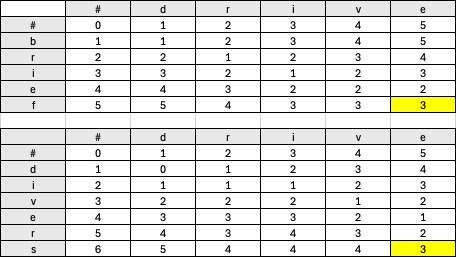






```

1. Kita buat tabel berukuran (len(str1)+1) × (len(str2)+1) karena perlu ruang untuk empty string
2. Row pertama kita isi 0,1,2,3... yang artinya cost untuk mengubah empty string menjadi prefix str2
3.Column pertama kita isi 0,1,2,3... yang artinya cost untuk mengubah prefix str1 menjadi empty string
4. Untuk setiap cell, kita cek apakah karakter di posisi tersebut sama atau tidak
5. Kalau karakternya sama, kita ambil nilai diagonal karena tidak ada cost tambahan
6. Kalau karakternya beda, kita pilih cost minimum dari 3 operasi (delete, insert, substitute) lalu tambah 1
7. Setelah semua cell terisi, jawaban edit distance ada di pojok kanan bawah tabel

Terbukti dalam codingan maupun dalam table yang dibuat (manual) hasilnya sama


```

